просто устанавливаем матплот потому что иначе он не хотел устанавливаться

In [141]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## просто вывод колонок датасета

In [142]:
import pandas as pd
df = pd.read_csv("..//static//csv//car_price_prediction.csv", sep=",")
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

## преобразуем пробег в число

In [143]:
df['Mileage'] = df['Mileage'].str.replace(r'\D+', '', regex=True).astype(float)

## отрисовываю круговую диаграмму по которой можно сделать вывод о распределении типов двигателей

Fuel type
Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: count, dtype: int64

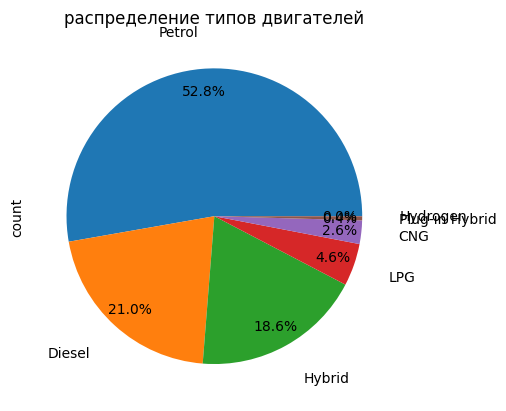

In [144]:
import matplotlib.pyplot as plt

df['Fuel type'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False, y='', title='распределение типов двигателей', 
                 pctdistance=0.85,  # Расположение процентов внутри круга
                 labeldistance=1.25)  # Расположение меток снаружи круга
df['Fuel type'].value_counts()

вывод: бензиновых двигателей больше чем всех остальных вместе взятых, а дизель и гибрид делят остальную половину почти пополам  
З.Ы.  
&nbsp;&nbsp;&nbsp;&nbsp;CNG(Природный газ)  
&nbsp;&nbsp;&nbsp;&nbsp;LPG (Сжиженный нефтяной газ)

## график Распределения цен, так как среди записей есть машина за 1$ и 20'000'000$, то пришлось деласть фильтрацию для отсеивания ненормальных значений, а то на графике вообще ничего видно не было.

минимальная цена:1
максимальная цена:26307500


<Axes: title={'center': 'Распределение цен (в пределах нормы)'}, xlabel='Цена', ylabel='Количество'>

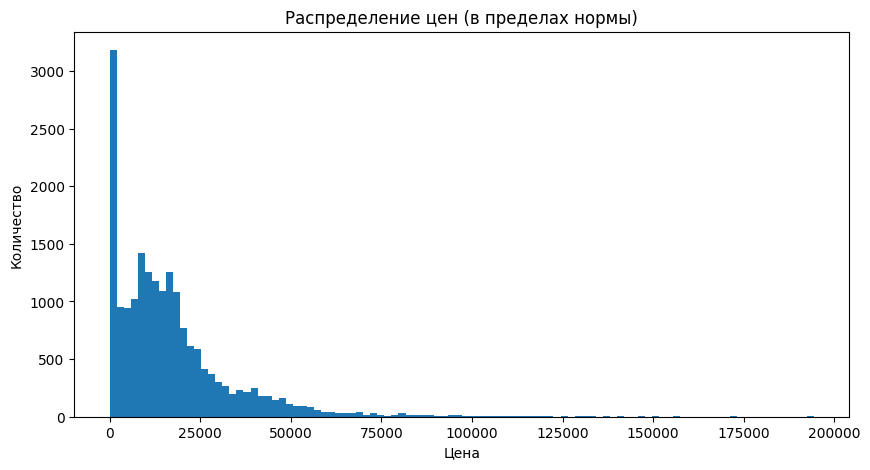

In [145]:
print('минимальная цена:' + str(df['Price'].min()))
print('максимальная цена:' + str(df['Price'].max()))
mean_price = df['Price'].median()
std_price = df['Price'].std()

# Фильтрация данных: оставляем только значения в пределах одного стандартного отклонения
df_filtered = df[(df['Price'] >= mean_price - std_price) & (df['Price'] <= mean_price + std_price)]

# Построение гистограммы для отфильтрованных значений
df_filtered['Price'].plot(kind='hist', bins=100, figsize=(10, 5), title='Распределение цен (в пределах нормы)', xlabel='Цена', ylabel = 'Количество')

вывод: большинство машин было проданно менее 25000$

## график зависимости цены от пробега для первых 100 элементов

<Axes: title={'center': 'Зависимость цены от пробега'}, xlabel='Пробег', ylabel='Цена'>

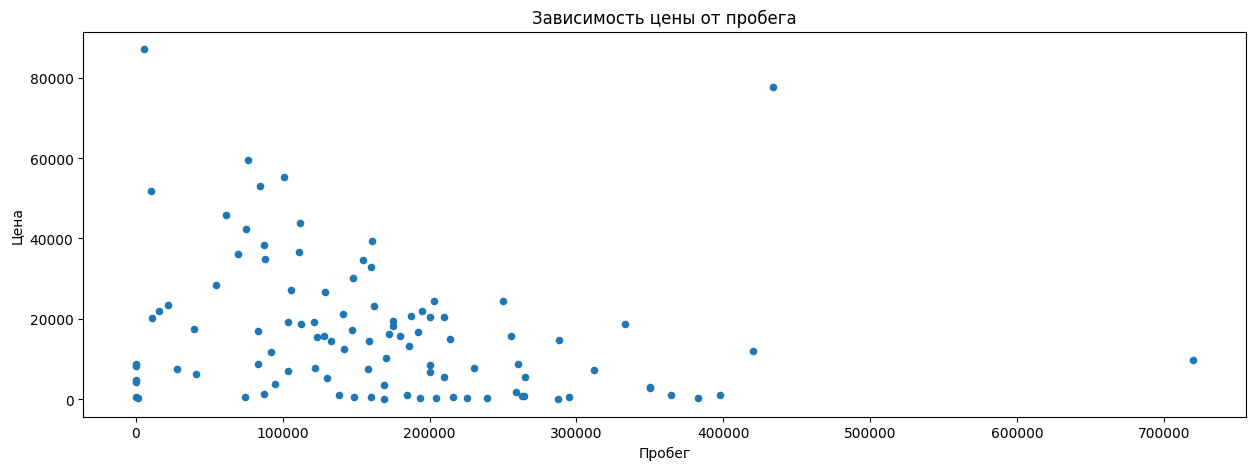

In [146]:
df[0:100].plot.scatter(x="Mileage", y="Price", title ='Зависимость цены от пробега', xlabel = 'Пробег', ylabel = 'Цена', figsize=(15, 5),)

вывод:  
1. даже уже в первых 100 есть аномалии, где пробег почти 1М  
2. чем больше пробег тем сложнее продать машину за дорого

## повторим этот график только отфильтруем все значения вне нормы, и не только первые 100

минимальный пробег:0.0
максимальный пробег:2147483647.0


<Axes: title={'center': 'Зависимость цены от пробега(в пределах нормы)'}, xlabel='Пробег', ylabel='Цена'>

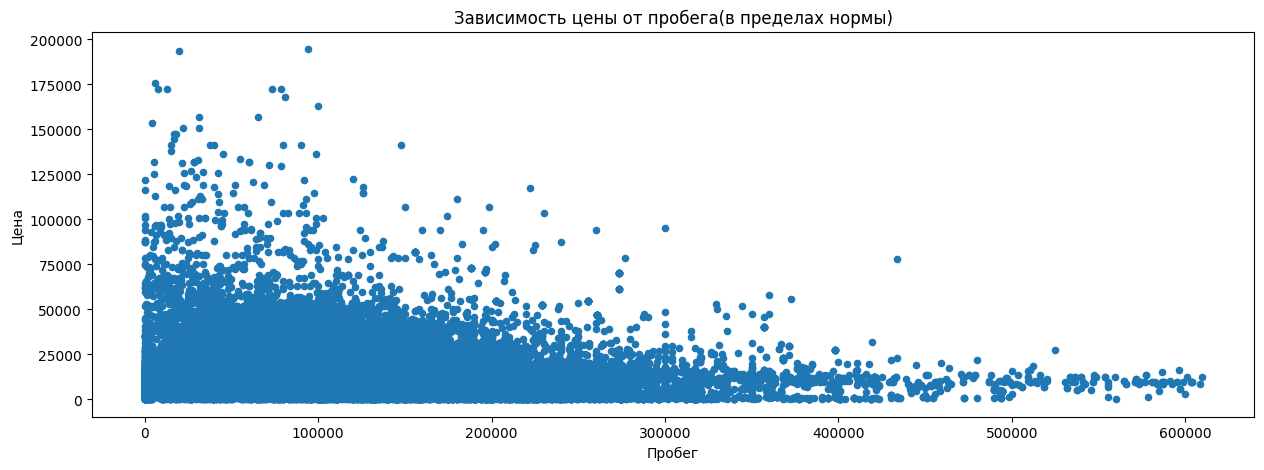

In [147]:
print('минимальный пробег:' + str(df['Mileage'].min()))
print('максимальный пробег:' + str(df['Mileage'].max()))
mean_mileage = df_filtered['Mileage'].median()
std_mileage = df_filtered['Mileage'].std()/100

# Фильтрация данных: оставляем только значения в пределах одного стандартного отклонения
df_double_filtered = df_filtered[(df_filtered['Mileage'] >= mean_mileage - std_mileage) & (df_filtered['Mileage'] <= mean_mileage + std_mileage)]

df_double_filtered.plot.scatter(x="Mileage", y="Price", title ='Зависимость цены от пробега(в пределах нормы)', xlabel = 'Пробег', ylabel = 'Цена', figsize=(15, 5),)

так то приятнее глазу. И нагляднее, что при пробеге за 300к машину выше 25к сложно продать